<h2><center>Tugas 1 Data Mining 2019/2020</center></h2>


<center><font color="red">Deadline: 19 Oktober 2019 pukul 23.55</font><center>

---





<h4>Nama    :  Muhammad Yudistira Hanifmuti</h4>
<h4>NPM     :  1606829560</h4>

<b> Petunjuk Umum: </b>

1. Kerjakanlah soal-soal berikut dengan menggunakan data Wine yang telah tersedia pada library scikit-learn. Lakukan pengolahan data dan perhitungan menggunakan bahasa pemrograman Python. Perhitungan tidak boleh menggunakan fungsi yang sudah tersedia di dalam library, eg. menghitung mean dengan menggunakan numpy.mean(...) atau mengitung covariance dengan menggunakan numpy.cov(..).

2. Gunakan template Jupyter notebook yang telah disediakan untuk menjawab soal.

3. Format penulisan nama file di Jupyter notebook: T1_Nama_NIM.ipynb

4. Kumpulkan pada slot yang disediakan di scele. Deadline: 19 Oktober 2019 pukul 23.55. 



<h5>*) Tulis jawaban ditempat yang sudah disediakan</h5>



<b><i>Data processing</i></b>

1. Berapa banyak instances dan dimensi dari data Wine tersebut?
2. Hitunglah range, Interquartile range dan variance dari masing-masing kolom!
3. Buatlah scatter plot 2D dari data kolom 'alcohol' dan 'malic_acid'!
4. Dengan data dari kolom 'alcohol' dan 'malic_acid', ubah data menjadi centered data matrix!
5. Hitunglah mean data kolom 'alcohol' dan 'malic_acid' dari centered data matrix!
6. Buatlah scatter 2 plot 2D, yaitu:
<dd>a. scatter plot 2D dari centered data matrix</dd>
<dd>b. scatter plot 2D dari centered data matrix dengan memberikan warna/simbol berbeda untuk kelas yang berbeda.</dd> 
7. Hitunglah covariance matrix data kolom 'alcohol' dan 'malic_acid' dari centered data matrix!
8. Lakukan standard normalization pada data dimasing-masing kolom! Apa yang terjadi setelah dilakukan normalisasi?


Jawaban:

In [1]:
#1.

from sklearn.datasets import load_wine

dataset = load_wine()
wine = load_wine()
data = dataset.data
print('Banyak instances dari data Wine adalah', data.shape[0])
print('Dimensi dari data Wine adalah', data.shape[1])

Banyak instances dari data Wine adalah 178
Dimensi dari data Wine adalah 13


In [2]:
#2.

import numpy as np
import pandas as pd

def sample_range(arr):
    return np.max(arr) - np.min(arr)

def sample_iqr(arr):
    return np.quantile(arr, 0.75) - np.quantile(arr, 0.25)

def sample_mean(arr):
    return np.sum(arr)/arr.size

def sample_var(arr):
    deviation = arr - sample_mean(arr)
    return np.sum(np.power(deviation, 2))/arr.size


df = pd.DataFrame(data= np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['target'])
df['target'] = df['target'].astype(str)
feat_names = dataset.feature_names

print('Berikut adalah perhitungan range, interquartile range (IQR) dan variance untuk setiap kolom :')

for i, feature in enumerate(feat_names):
    data_column = df[feature]
    print()
    print(i+1, ')', feature)
    print('range :', sample_range(data_column))
    print('IQR :', sample_iqr(data_column))
    print('variance :', sample_var(data_column))

Berikut adalah perhitungan range, interquartile range (IQR) dan variance untuk setiap kolom :

1 ) alcohol
range : 3.8000000000000007
IQR : 1.3150000000000013
variance : 0.6553597304633255

2 ) malic_acid
range : 5.06
IQR : 1.4799999999999998
variance : 1.2410040809241256

3 ) ash
range : 1.8699999999999999
IQR : 0.34750000000000014
variance : 0.0748418002777427

4 ) alcalinity_of_ash
range : 19.4
IQR : 4.300000000000001
variance : 11.09003061482136

5 ) magnesium
range : 92.0
IQR : 19.0
variance : 202.8433278626436

6 ) total_phenols
range : 2.9
IQR : 1.0574999999999999
variance : 0.3894890323191517

7 ) flavanoids
range : 4.74
IQR : 1.6700000000000002
variance : 0.9921135115515718

8 ) nonflavanoid_phenols
range : 0.53
IQR : 0.16749999999999998
variance : 0.015401619113748264

9 ) proanthocyanins
range : 3.17
IQR : 0.7
variance : 0.32575424820098475

10 ) color_intensity
range : 11.72
IQR : 2.9800000000000004
variance : 5.344255847629093

11 ) hue
range : 1.23
IQR : 0.337500000000000

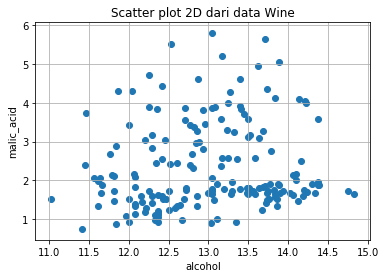

In [3]:
#3.

import matplotlib.pyplot as plt

%matplotlib inline

x, y = df['alcohol'], df['malic_acid']

p1 = plt.scatter(x, y)
plt.title('Scatter plot 2D dari data Wine')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.grid()
plt.show()

In [4]:
#4.

# Dengan data dari kolom 'alcohol' dan 'malic_acid', ubah data menjadi centered data matrix!

def mean_matrix(arr):
    return np.sum(arr, axis=0)/arr.shape[0]

def centered_data_matrix(arr):
    return arr - mean_matrix(arr)
    
centered_data = centered_data_matrix(data)
centered_df = pd.DataFrame(data= np.c_[centered_data, wine['target']], columns= wine['feature_names'] + ['target'])
centered_df['target'] = centered_df['target'].astype(str)
alcohol, malic_acid = centered_data[:, feat_names.index('alcohol')], centered_data[:, feat_names.index('malic_acid')]

print('Data yang sudah diubah menjadi centered data matrix.')
print()
print('Kolom "alcohol" :')
print(alcohol)
print()
print('Kolom "malic_acid" :')
print(malic_acid)

Data yang sudah diubah menjadi centered data matrix.

Kolom "alcohol" :
[ 1.22938202  0.19938202  0.15938202  1.36938202  0.23938202  1.19938202
  1.38938202  1.05938202  1.82938202  0.85938202  1.09938202  1.11938202
  0.74938202  1.74938202  1.37938202  0.62938202  1.29938202  0.82938202
  1.18938202  0.63938202  1.05938202 -0.07061798  0.70938202 -0.15061798
  0.49938202  0.04938202  0.38938202  0.29938202  0.86938202  1.01938202
  0.72938202  0.57938202  0.67938202  0.75938202  0.50938202  0.47938202
  0.27938202  0.04938202  0.06938202  1.21938202  0.55938202  0.40938202
  0.87938202  0.23938202  0.04938202  1.20938202  1.37938202  0.89938202
  1.09938202  0.93938202  0.04938202  0.82938202  0.81938202  0.76938202
  0.73938202  0.55938202  1.21938202  0.28938202  0.71938202 -0.63061798
 -0.67061798 -0.36061798  0.66938202 -0.63061798 -0.83061798 -0.63061798
  0.10938202 -0.63061798  0.33938202 -0.79061798 -0.71061798  0.85938202
  0.48938202 -0.01061798 -1.04061798 -1.34061798  0.

In [5]:
#5.

# Hitunglah mean data kolom 'alcohol' dan 'malic_acid' dari centered data matrix!

print('Mean dari centered data matrix adalah sebagai berikut.')
print('Kolom "alcohol" :', sample_mean(centered_df['alcohol']))
print('Kolom "alcohol" :', sample_mean(centered_df['malic_acid']))

Mean dari centered data matrix adalah sebagai berikut.
Kolom "alcohol" : 6.386900995596406e-15
Kolom "alcohol" : 3.5926318100229784e-16


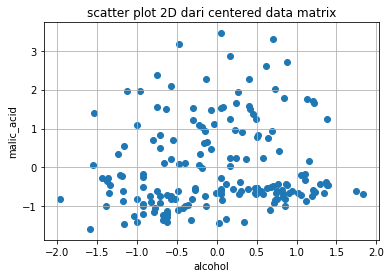

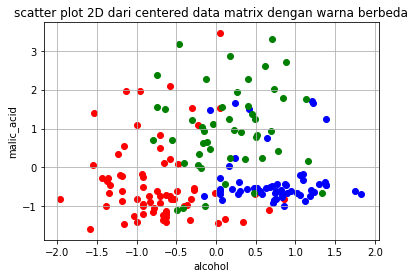

In [6]:
#6.

# Buatlah scatter 2 plot 2D, yaitu:
# a. scatter plot 2D dari centered data matrix
# b. scatter plot 2D dari centered data matrix dengan memberikan warna/simbol berbeda untuk kelas yang berbeda.

import matplotlib.pyplot as plt

%matplotlib inline

s1 = plt.scatter(x=centered_df['alcohol'], y=centered_df['malic_acid'])

plt.title('scatter plot 2D dari centered data matrix')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.grid()
plt.show()

# Plot each target
target = list(set(centered_df['target']))
color = ['red', 'blue', 'green']
x, y = centered_df['alcohol'], centered_df['malic_acid']
for i, val in enumerate(target):
    idx = centered_df['target'] == val
    plt.scatter(x[idx], y[idx], color=color[i])

plt.title('scatter plot 2D dari centered data matrix dengan warna berbeda')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.grid()
plt.show()

In [7]:
#7.

# Hitunglah covariance matrix data kolom 'alcohol' dan 'malic_acid' dari centered data matrix!

def cov(x, y):
    x_mean, y_mean = sample_mean(x), sample_mean(y)
    return np.sum((x - x_mean)*(y-y_mean))/(x.size - 1)
    
def bivariate_cov_mat(arr):
    return np.array([
        [cov(arr[:,0], arr[:,0]), cov(arr[:,0], arr[:,1])],
        [cov(arr[:,1], arr[:,0]), cov(arr[:,1], arr[:,1])]
    ])

print('Covariance matrix dari data kolom "alcohol" dan "malic_acid" dari centered data matrix adalah')
print(bivariate_cov_mat(centered_df[['alcohol', 'malic_acid']].values))

Covariance matrix dari data kolom "alcohol" dan "malic_acid" dari centered data matrix adalah
[[0.65906233 0.08561131]
 [0.08561131 1.2480154 ]]


In [8]:
#8

# Lakukan standard normalization pada data dimasing-masing kolom! Apa yang terjadi setelah dilakukan normalisasi?

def standard_scaler(arr):
    centered_arr = arr - mean_matrix(arr)
    variances = np.array(list(map(sample_var, arr.T)))
    return centered_arr/np.sqrt(variances)

standarized = standard_scaler(data)
standarized_df = pd.DataFrame(data= np.c_[standarized, wine['target']], columns= wine['feature_names'] + ['target'])
standarized_df['target'] = standarized_df['target'].astype(str)

print('Akibat dari normalisasi adalah data memiliki mean sama dengan 0 dan standar deviasi (atau variance) sama dengan 1')
print()
print('Berikut adalah perhitungan mean dan variance untuk setiap kolom setelah dilakukan standarisasi:')

for i, feature in enumerate(feat_names):
    data_column = standarized_df[feature]
    print()
    print(i+1, ')', feature)
    print('mean :', sample_mean(data_column))
    print('variance :', sample_var(data_column))

Akibat dari normalisasi adalah data memiliki mean sama dengan 0 dan standar deviasi (atau variance) sama dengan 1

Berikut adalah perhitungan mean dan variance untuk setiap kolom setelah dilakukan standarisasi:

1 ) alcohol
mean : 7.903789982050553e-15
variance : 1.0

2 ) malic_acid
mean : 3.193450497798203e-16
variance : 1.0000000000000002

3 ) ash
mean : -4.0679070598906016e-15
variance : 1.0000000000000002

4 ) alcalinity_of_ash
mean : -3.991813122247754e-17
variance : 1.0

5 ) magnesium
mean : -3.991813122247754e-17
variance : 1.0

6 ) total_phenols
mean : 0.0
variance : 0.9999999999999999

7 ) flavanoids
mean : 9.979532805619385e-16
variance : 1.0

8 ) nonflavanoid_phenols
mean : -5.588538371146855e-16
variance : 1.0

9 ) proanthocyanins
mean : -1.6965205769552954e-15
variance : 0.9999999999999999

10 ) color_intensity
mean : -3.4429388179386877e-16
variance : 1.0

11 ) hue
mean : 1.6765615113440566e-15
variance : 1.0

12 ) od280/od315_of_diluted_wines
mean : 2.1954972172362645e-1

<b><i>Algebraic and Geometric Views</i></b>

8. Lakukan proyeksi orthogonal pada data kolom 'alcohol' dan 'malic_acid' terhadap persamaan x1=x2 (serupa dengan persamaan linear y=x untuk sumbu x dan y)!
9. Buatlah scatter plot 2D dari hasil proyeksi orthogonal tersebut dengan warna/simbol berbeda untuk kelas yang berbeda!
10. Apakah garis x1=x2 berhasil memisahkan kelas yang satu dengan kelas yang lainnya pada data ? Jelaskan jawaban Anda dengan menganalisis hasil plot Anda!


Jawaban:

In [9]:
#1.

# Lakukan proyeksi orthogonal pada data kolom 'alcohol' dan 'malic_acid' terhadap persamaan x1=x2 (serupa dengan persamaan linear y=x untuk sumbu x dan y)!

def projection(a, b):
    coef = np.inner(a, b)/np.inner(a, a)
    return np.multiply(coef.T, a)

data_vector = df[['alcohol', 'malic_acid']].values
unit_vector = np.array([[1, 1]])
proj = projection(unit_vector, data_vector)
df['proj_x'], df['proj_y'] = proj[:, 0], proj[:, 1]

print('Berikut hasil proyeksi orthogonal terhadap x1=x2 :\n')
print(projection(unit_vector, data_vector))

Berikut hasil proyeksi orthogonal terhadap x1=x2 :

[[7.97  7.97 ]
 [7.49  7.49 ]
 [7.76  7.76 ]
 [8.16  8.16 ]
 [7.915 7.915]
 [7.98  7.98 ]
 [8.13  8.13 ]
 [8.105 8.105]
 [8.235 8.235]
 [7.605 7.605]
 [8.13  8.13 ]
 [7.8   7.8  ]
 [7.74  7.74 ]
 [8.24  8.24 ]
 [8.125 8.125]
 [7.72  7.72 ]
 [8.11  8.11 ]
 [7.7   7.7  ]
 [7.89  7.89 ]
 [8.37  8.37 ]
 [7.845 7.845]
 [8.365 8.365]
 [7.785 7.785]
 [7.225 7.225]
 [7.655 7.655]
 [7.55  7.55 ]
 [7.58  7.58 ]
 [7.51  7.51 ]
 [7.885 7.885]
 [7.85  7.85 ]
 [7.615 7.615]
 [7.62  7.62 ]
 [7.755 7.755]
 [7.645 7.645]
 [7.655 7.655]
 [7.645 7.645]
 [7.46  7.46 ]
 [7.35  7.35 ]
 [7.285 7.285]
 [9.105 9.105]
 [7.635 7.635]
 [8.625 8.625]
 [7.885 7.885]
 [8.61  8.61 ]
 [7.41  7.41 ]
 [9.125 9.125]
 [8.985 8.985]
 [7.79  7.79 ]
 [8.06  8.06 ]
 [7.835 7.835]
 [7.39  7.39 ]
 [7.74  7.74 ]
 [7.785 7.785]
 [7.835 7.835]
 [7.705 7.705]
 [7.645 7.645]
 [7.96  7.96 ]
 [7.63  7.63 ]
 [7.575 7.575]
 [6.655 6.655]
 [6.715 6.715]
 [7.    7.   ]
 [7.46  7.46 ]
 [6

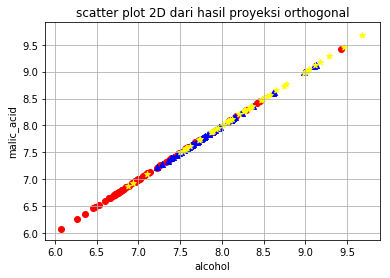

In [10]:
#2.

# Buatlah scatter plot 2D dari hasil proyeksi orthogonal tersebut dengan warna/simbol berbeda untuk kelas yang berbeda!

# Plot each target
target = list(set(centered_df['target']))
color = ['red', 'blue', 'yellow']
marker = ['o', '^', '*']
x, y = df['proj_x'], df['proj_y']
for i, val in enumerate(target):
    idx = df['target'] == val
    plt.scatter(x[idx], y[idx], color=color[i], marker=marker[i])

plt.title('scatter plot 2D dari hasil proyeksi orthogonal')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.grid()
plt.show()

In [11]:
#3.

# Apakah garis x1=x2 berhasil memisahkan kelas yang satu dengan kelas yang lainnya pada data ? Jelaskan jawaban Anda dengan menganalisis hasil plot Anda!

jawaban ="""
Garis x1 = x2 belum berhasil sepenuhnya memisahkan kelas yang satu dengan kelas yang lain. \
Terlihat bahwa masih ada kelas yang tercampur pada suatu bagian pada garis sehingga garis \
belum berhasil memisahkan dengan jelas. \
Walaupun sebenarnya sudah terlihat ada satu kelas yang sudah berkumpul pada satu bagian.
"""

print(jawaban)


Garis x1 = x2 belum berhasil sepenuhnya memisahkan kelas yang satu dengan kelas yang lain. Terlihat bahwa masih ada kelas yang tercampur pada suatu bagian pada garis sehingga garis belum berhasil memisahkan dengan jelas. Walaupun sebenarnya sudah terlihat ada satu kelas yang sudah berkumpul pada satu bagian.



<b><i>Probabilistic View</i></b>

11. Dengan satu kali percobaan, hitunglah probabilitas dimana Anda dapat memilih wine yang memiliki kandungan Flavanoids kurang dari 1 mg/L!
12. Dengan 25 kali percobaan, hitunglah probabilitas dimana Anda dapat memilih 5 wine yang memiliki kandungan Flavanoids kurang dari 1 mg/L!


Jawaban:

In [12]:
#1.

# Dengan satu kali percobaan, hitunglah probabilitas dimana Anda dapat memilih wine yang memiliki kandungan Flavanoids kurang dari 1 mg/L!

def combination(m, k):
    return np.math.factorial(m)/(np.math.factorial(k) * np.math.factorial(m-k))

def binomial_pmf(trials, success, prob):
    return combination(trials, success) * prob ** success * (1 - prob) ** (trials - success)

sample_space = len(df)
target = len(df[df.flavanoids < 1.0])
prob = target/sample_space

print('Probabilitas memilih wine yang memiliki kandungan Flavanoids kurang dari 1mg/L adalah', binomial_pmf(1, 1, prob))

Probabilitas memilih wine yang memiliki kandungan Flavanoids kurang dari 1mg/L adalah 0.2247191011235955


In [13]:
#2.

# Dengan 25 kali percobaan, hitunglah probabilitas dimana Anda dapat memilih 5 wine yang memiliki kandungan Flavanoids kurang dari 1 mg/L!

print('Probabilitas memilih 5 wine yang memiliki kandungan Flavanoids kurang dari 1mg/L dalam 25 percobaan adalah', binomial_pmf(25, 5, prob))

Probabilitas memilih 5 wine yang memiliki kandungan Flavanoids kurang dari 1mg/L dalam 25 percobaan adalah 0.18737922693087627
